## 목표 : 미니배치기반 기계학습 진행 실습
- 확률적 경사하강법 기반의 알고리즘 적용 모델
- 데이터의 처음부터 끝까지(에포크) 학습 후 가중치(weight)와 절편(bias) 업데이트 하는 방식에서 에포크를 미니배치 크기만큼 나누어서 학습 후 가중치(W)와 절편(b) 업데이트 진행 함
- 장점
    - 온라인 학습 즉, 점진적 학습 가능 => partial_fit() : 기존 모델에 추가로 1에포크 학습
    - 기존의 다른 모델보다 속도 빠름 => 랜덤으로 한 개 데이터 모델 추가
    - 초기 학습 중단 설정 가능
- 단점 
    - 전체 학습돠 정확도는 떨어질 수 있음

### (1) 모듈 로딩 및 데이터 확인 <hr>

In [490]:
import matplotlib.pyplot as plt
# 모듈 로딩
import pandas as pd

data = '../data/fish.csv'

In [491]:
# 데이터 로딩
fishDF = pd.read_csv(data)
fishDF

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


### (2) 데이터 전처리 => 학습을 위한 가공 <hr>

#### [2-1] 피쳐 / 타겟 분리

In [492]:
featureDF = fishDF[fishDF.columns[1:]]
targetDF=fishDF['Species']

print(f'피쳐 =>{featureDF.shape}, 타겟 => {targetDF.shape}')

피쳐 =>(159, 5), 타겟 => (159,)


#### [2-2] 학습/테스트용 데이터셋 분리

In [493]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(featureDF,
                                    targetDF,
                                    stratify=targetDF,
                                    random_state=41)

In [494]:
print(f'[훈련용] => {X_train.shape}, {y_train.shape}')
print(f'[테스트용] => {x_test.shape}, {y_test.shape}')

[훈련용] => (119, 5), (119,)
[테스트용] => (40, 5), (40,)


#### [2-3] 피쳐 => 스케일링

In [495]:
from sklearn.preprocessing import StandardScaler

sdScaler = StandardScaler()
sdScaler.fit(X_train)

StandardScaler()

In [496]:
# 훈련용 데이터셋 스케일링
scaled_X_train = sdScaler.transform(X_train)

# 테스트용 데이터셋 스케일링
scaled_X_test = sdScaler.transform(x_test)

### [3] 학습 진행 <hr>
- 학습 방법 : 확률적경사하강법(SGD) 기반의 분류

In [497]:
# 모델 인스턴스 생성
from sklearn.linear_model import SGDClassifier

model1 = SGDClassifier(random_state=41, verbose=1, loss='log_loss', n_iter_no_change=100)
model1.fit(scaled_X_train, y_train)

-- Epoch 1
Norm: 33.33, NNZs: 5, Bias: -18.910490, T: 119, Avg. loss: 1.121288
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 30.62, NNZs: 5, Bias: -19.587060, T: 238, Avg. loss: 0.007745
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 29.98, NNZs: 5, Bias: -17.437078, T: 357, Avg. loss: 0.008192
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 26.68, NNZs: 5, Bias: -19.560452, T: 476, Avg. loss: 0.006428
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 26.82, NNZs: 5, Bias: -18.044933, T: 595, Avg. loss: 0.011403
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 26.72, NNZs: 5, Bias: -15.887572, T: 714, Avg. loss: 0.007371
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 24.46, NNZs: 5, Bias: -17.273381, T: 833, Avg. loss: 0.005281
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 24.60, NNZs: 5, Bias: -15.308677, T: 952, Avg. loss: 0.005627
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 24.08, NNZs: 5, Bias: -14.822851, T: 1071, Avg. loss: 0.008097
Total tr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished


SGDClassifier(loss='log_loss', n_iter_no_change=100, random_state=41, verbose=1)

In [498]:
train_score1 = model1.score(scaled_X_train, y_train)
test_score1 = model1.score(scaled_X_test, y_test)

In [499]:
print(f'[기본 SGD] 학습 점수 : {train_score1}, 테스트 점수 : {test_score1}')

[기본 SGD] 학습 점수 : 0.9495798319327731, 테스트 점수 : 0.95


In [500]:
# 학습 후 설정된 파라미터 즉 모델 파라미터 확인
print(f' n_iter_ : {model1.n_iter_}')

 n_iter_ : 273


- 1 에포크씩 점진적으로 학습 진행 => partial_fit()


In [505]:
# 모델 인스턴스 생성
model2 = SGDClassifier(loss='log_loss', alpha= 0.000003)
model2.partial_fit(scaled_X_train, y_train, y_train.unique())

SGDClassifier(alpha=3e-06, loss='log_loss')

In [506]:
train_score2 = model2.score(scaled_X_train, y_train)
test_score2 = model2.score(scaled_X_test, y_test)
print(f'[기본 SGD] 학습 점수 : {train_score2}, 테스트 점수 : {test_score2}')

[기본 SGD] 학습 점수 : 0.5546218487394958, 테스트 점수 : 0.575


In [507]:
train_score, test_score, train_test = [], [], []
for n in range(100):
    model2.partial_fit(scaled_X_train, y_train, y_train.unique())
    train_score2 = model2.score(scaled_X_train, y_train)
    test_score2 = model2.score(scaled_X_test, y_test)
    print(f'[{n+1}번 학습][기본 SGD] 학습 점수 : {train_score2}, 테스트 점수 : {test_score2}')
    train_score.append(train_score2)
    test_score.append(test_score2)
    if test_score2 > 0.95:
        if abs(test_score2 - train_score2) >= 0.03 :
            break


[1번 학습][기본 SGD] 학습 점수 : 0.7815126050420168, 테스트 점수 : 0.7
[2번 학습][기본 SGD] 학습 점수 : 0.6470588235294118, 테스트 점수 : 0.575
[3번 학습][기본 SGD] 학습 점수 : 0.6302521008403361, 테스트 점수 : 0.575
[4번 학습][기본 SGD] 학습 점수 : 0.7226890756302521, 테스트 점수 : 0.725
[5번 학습][기본 SGD] 학습 점수 : 0.8319327731092437, 테스트 점수 : 0.725
[6번 학습][기본 SGD] 학습 점수 : 0.6218487394957983, 테스트 점수 : 0.575
[7번 학습][기본 SGD] 학습 점수 : 0.7647058823529411, 테스트 점수 : 0.725
[8번 학습][기본 SGD] 학습 점수 : 0.7983193277310925, 테스트 점수 : 0.8
[9번 학습][기본 SGD] 학습 점수 : 0.680672268907563, 테스트 점수 : 0.55
[10번 학습][기본 SGD] 학습 점수 : 0.6218487394957983, 테스트 점수 : 0.575
[11번 학습][기본 SGD] 학습 점수 : 0.865546218487395, 테스트 점수 : 0.825
[12번 학습][기본 SGD] 학습 점수 : 0.680672268907563, 테스트 점수 : 0.675
[13번 학습][기본 SGD] 학습 점수 : 0.6638655462184874, 테스트 점수 : 0.625
[14번 학습][기본 SGD] 학습 점수 : 0.6302521008403361, 테스트 점수 : 0.55
[15번 학습][기본 SGD] 학습 점수 : 0.8487394957983193, 테스트 점수 : 0.8
[16번 학습][기본 SGD] 학습 점수 : 0.8067226890756303, 테스트 점수 : 0.775
[17번 학습][기본 SGD] 학습 점수 : 0.7394957983193278, 테스트 점수 : 0.7
[1

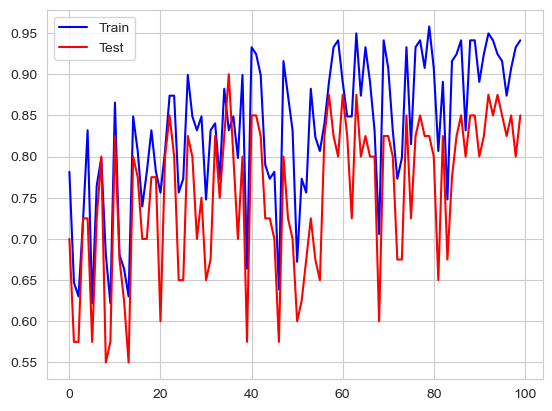

In [508]:
import matplotlib.pyplot as plt
plt.plot(train_score, 'b-', label='Train')
plt.plot(test_score, 'r-', label='Test')
# plt.plot(train_test, 'g-', label='Train-Test')
plt.legend()
plt.show()